<a href="https://colab.research.google.com/github/manjunathggaonkar/Task/blob/master/checkkaggleolist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
!pip install kaggle

In [16]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manjunathggaonkar","key":"f4639546f3a073bead67a80b0179c365"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d olistbr/marketing-funnel-olist

  0% 0.00/278k [00:00<?, ?B/s]
100% 278k/278k [00:00<00:00, 41.1MB/s]


In [19]:
from zipfile import ZipFile
file_name = "marketing-funnel-olist.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [20]:
mql = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")
mql.head(10)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social


In [21]:
cdb = pd.read_csv("olist_closed_deals_dataset.csv")
mfb = mql.merge(cdb, on='mql_id', how='left')
mfb.head(10)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.value_counts(mfb['origin'])

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

In [23]:
mfb["origin"].value_counts(normalize=True)

organic_search       0.289169
paid_search          0.199748
social               0.170025
unknown              0.138413
direct_traffic       0.062846
email                0.062091
referral             0.035768
other                0.018892
display              0.014861
other_publicities    0.008186
Name: origin, dtype: float64

In [24]:
mfbi = mql.merge(cdb, on='mql_id', how='inner')
mfbi["origin"].value_counts(normalize=True)

organic_search       0.327295
paid_search          0.235507
unknown              0.216184
social               0.090580
direct_traffic       0.067633
referral             0.028986
email                0.018116
display              0.007246
other                0.004831
other_publicities    0.003623
Name: origin, dtype: float64

In [25]:
mfbi["landing_page_id"].value_counts(normalize=True)

22c29808c4f815213303f8933030604c    0.206651
b76ef37428e6799c421989521c0e5077    0.203088
40dec9f3d5259a3d2dbcdab2114fae47    0.079572
ce1a65abd0973638f1c887a6efcfa82d    0.070071
88740e65d5d6b056e0cda098e1ea6313    0.036817
                                      ...   
0e5a178e3cd2368607f3e72f46140476    0.001188
13fa6688e41e863dcbfdb4c6112c4c86    0.001188
ffc62d6945fd1423539ec6d96326c37c    0.001188
ee40ded7dc801923f81ab6dbbf6e5417    0.001188
e998c9a2c0e92504311cde9e43a34026    0.001188
Name: landing_page_id, Length: 134, dtype: float64

In [26]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

 63% 27.0M/42.7M [00:00<00:00, 68.2MB/s]
100% 42.7M/42.7M [00:00<00:00, 108MB/s] 


In [27]:
from zipfile import ZipFile
file_name = "brazilian-ecommerce.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [28]:
items = pd.read_csv('olist_order_items_dataset.csv')
mfb_items = mfb.merge(items, on='seller_id', how='left')
mfb_items.head(10)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76
5,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,d8d281c1a1398a1e835fdc4adfb81e2a,1.0,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41
6,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,e5858127da61f07285827883e605254b,1.0,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00
7,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
origin = mfb_items.groupby(['origin']).sum()
origin.sort_values(by='price', ascending=False)

,declared_product_catalog_size,declared_monthly_revenue,order_item_id,price,freight_value
origin,,,,,
unknown,309.0,463006.0,1539.0,213742.70,25020.70
organic_search,5347.0,51426000.0,1592.0,207023.45,28933.13
paid_search,5951.0,9169000.0,1746.0,155277.05,26723.01
social,3312.0,501000.0,512.0,43477.99,7885.48
direct_traffic,135.0,60000.0,266.0,21903.90,5645.90
referral,105.0,0.0,95.0,17887.15,1800.69
email,20.0,15000.0,26.0,8484.99,637.42
other,0.0,0.0,112.0,6888.65,1877.98
display,0.0,0.0,7.0,923.00,284.95


**EDA**

In [30]:
from zipfile import ZipFile
file_name = "marketing-funnel-olist.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
%matplotlib inline

leads_df = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")
closed_leads_df = pd.read_csv("olist_closed_deals_dataset.csv")

In [0]:
#helper function
def pichart_with_table(main_df,column_name,title,top_n,filename):
    fig = plt.figure(figsize=(10,6))

    summary = main_df.groupby(column_name)["mql_id"].nunique().sort_values(ascending=False)
    df = pd.DataFrame({'source':summary.index, 'counts':summary.values})
    labels = df['source']
    counts = df['counts']
    
    ax1 = fig.add_subplot(121)
    if top_n > 0:
        ax1.pie(counts[0:top_n], labels=labels[0:top_n], autopct='%1.1f%%', startangle=180)
    else:
        ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.set_title(title)
    ax1.axis('equal')

    ax2 = fig.add_subplot(122)
    font_size=10
    ax2.axis('off')
    if top_n > 0:
        df_table = ax2.table(cellText=df.values[0:top_n], colLabels=df.columns, loc='center',colWidths=[0.8,0.2])
    else:
         df_table = ax2.table(cellText=df.values, colLabels=df.columns, loc='center',colWidths=[0.8,0.2])

    df_table.auto_set_font_size(False)
    df_table.set_fontsize(font_size)

    fig.tight_layout()
    plt.savefig(filename)
    plt.show()

# ****Summaries****

1) leads_df (marketing_qualified_leads_dataset)****

In [39]:
leads_df.describe(include="all")

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,64cde8cf262a59edacc95c80bd01d695,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


1. 8000 unique MQL IDs
2. 336 separate date instances which show first contact date
3. 495 unique landing pages/sources captured
4. 10 unique points of origin

# Origin Analysis******

Roughly 5.5k is online searches, social media and direct traffic (70%), 12% is unknown and rest are sources like email,referralsetc.

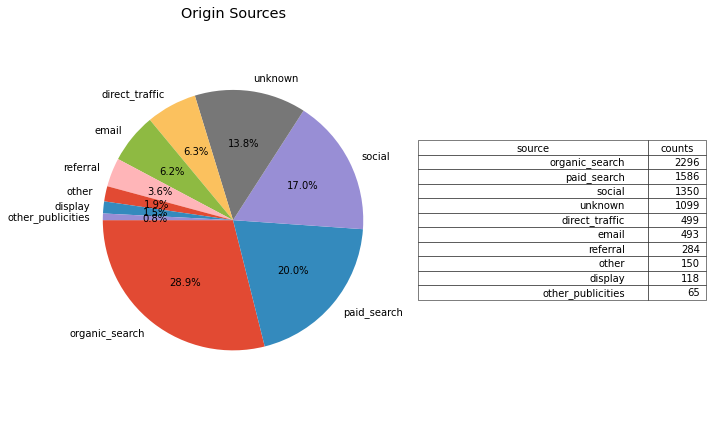

In [40]:
pichart_with_table(leads_df,"origin","Origin Sources",-1,"origin_mql.png")

First Contact Date Analysis 2018 data is much more (3x, roughly 6k) in comparison to 2017 data (approx.2k)


            mql_id
year month        
2017 6           4
     7         239
     8         386
     9         312
     10        416
     11        445
     12        200
2018 1        1141
     2        1028
     3        1174
     4        1352
     5        1303


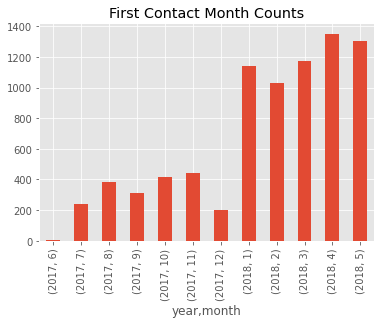

In [41]:
leads_df["first_contact_date"] = leads_df["first_contact_date"].astype("datetime64")
ldf = leads_df.groupby([leads_df["first_contact_date"].dt.year, leads_df["first_contact_date"].dt.month]).count()
ldf.index.names = ['year','month']
ldf = ldf.drop(['first_contact_date','landing_page_id','origin'], axis = 1) 
print(ldf)
ldf.plot(kind = "bar",legend = False)
plt.title("First Contact Month Counts")
plt.savefig('first_contact_mql.png')
plt.show()

2) closed_leads_df (closed_deals_dataset)**bold text**

In [42]:
closed_leads_df.describe(include="all")

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
count,842,842,842,842,842,841,836,665,63,64,66,832,69.000000,8.420000e+02
unique,842,842,32,22,824,33,8,9,2,2,6,3,NaN,NaN
top,b30be338efa14f74a40949dbafd02b57,fc7adf89a5d4fb88c007094fdae351c4,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,True,True,5-20,reseller,NaN,NaN
freq,1,1,140,133,6,105,332,407,58,54,22,587,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.028986,7.337768e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.380558,1.744799e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,0.000000e+00


* 842 unique MQL_IDs showing 842 closed deals mapped to unique seller_ids  (1-1 mapping)
* 32 unique Sales Developement Representative (SDR) with the max one SDR converted was 140 sellers
* 22 unique Sales Representatives (SR) with the max on SR related to 133 unique sellers.
* 33 unique business segments with home_decor being the most closed segment (105 leads)
* 8 unique lead types with online_medium being the most popular one (332 leads)
* 9 unique lead behaviour profiles with CAT being most popular one (407 leads)
* There is not much data for columns has_company, has_gtin, average_stock and declared_product_catalog size
* 3 unique business types with reseller being the most popular one (587 leads)



**Business Type Analysis**

Mostly its reseller and manufacturer

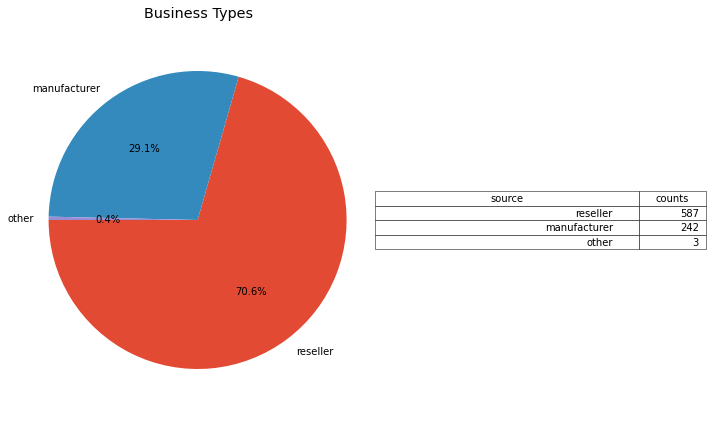

In [43]:
pichart_with_table(closed_leads_df,"business_type","Business Types",-1,'business_type_closed_deals.png')

**Lead Type Analysis**

Online being the dominating one (~83%) and offline and industry combined at ~17%

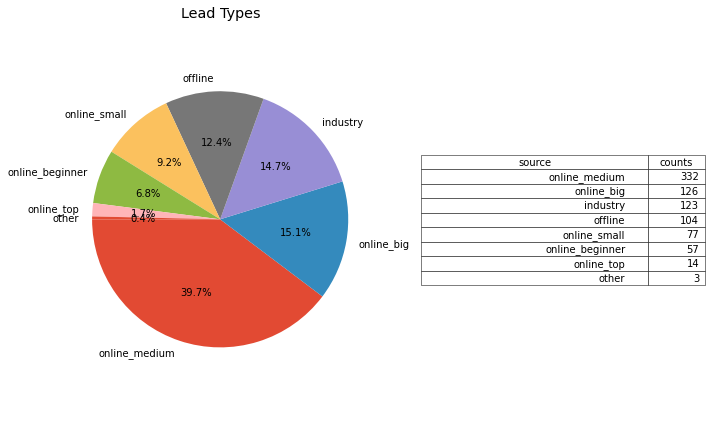

In [44]:
pichart_with_table(closed_leads_df,"lead_type","Lead Types",-1,'lead_type_closed_deals.png')